<a href="https://colab.research.google.com/github/hmzashh/Deep-Learning/blob/main/rock_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rock-Paper-Scissors Classifier using Deep Learning

Overview

* This project implements a complete pipeline to classify hand gestures (rock,
paper, scissors) using deep learning. It includes:

* Data preprocessing

* Model building using both MLP and CNN

* Evaluation and visualization

🛠️ Tools & Technologies
Python

* TensorFlow / Keras

* OpenCV

* NumPy, Matplotlib

* Google Colab

📊 Performance
* Test Accuracy: ~98.8% using CNN /Test Accuracy: 93% using ANN.

* Loss and accuracy curves were plotted to monitor training.

* Used early stopping and validation split for generalization.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", path)

100%|██████████| 306M/306M [00:02<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2


In [5]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split

dataset_path = "/root/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2/rps-cv-images"

IMG_SIZE = (100, 100)


# **using neural networks**

In [6]:
class_names = ['rock', 'paper', 'scissors']
X = []
y = []

for label_index, label in enumerate(class_names):
    folder = os.path.join(dataset_path, label)
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) /
            X.append(img_array.flatten())
            y.append(label_index)

X = np.array(X)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2188, 30000)
y shape: (2188,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 256)            │     7,680,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,721,603 (29.46 MB)

 Trainable params: 7,721,603 (29.46 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.3817 - loss: 3.1127 - val_accuracy: 0.6057 - val_loss: 0.8744
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6626 - loss: 0.8061 - val_accuracy: 0.5886 - val_loss: 1.2668
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.7064 - loss: 0.7729 - val_accuracy: 0.6800 - val_loss: 1.0304
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.7699 - loss: 0.6243 - val_accuracy: 0.6314 - val_loss: 1.2515
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.7663 - loss: 0.6247 - val_accuracy: 0.8371 - val_loss: 0.5244
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.8613 - loss: 0.4121 - val_accuracy: 0.7886 - val_loss: 0.5397
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8548 - loss: 0.4175 - val_accuracy: 0.8571 - val_loss: 0.4252
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.9016 - loss: 0.3195 - val_accuracy

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9345 - loss: 0.1989
Test Accuracy: 0.9360730648040771


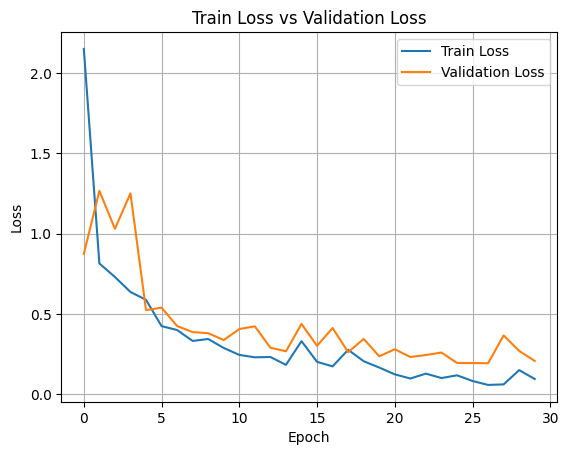

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


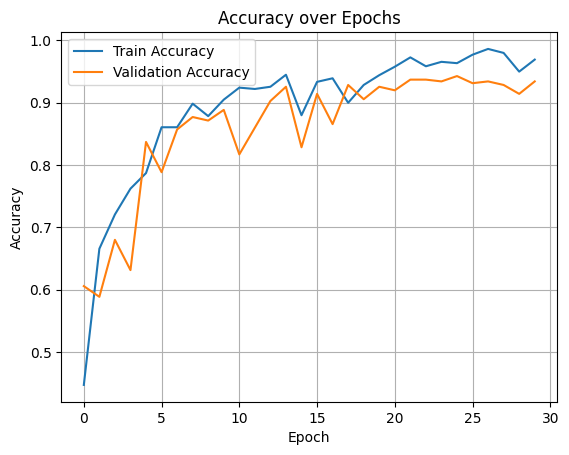

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


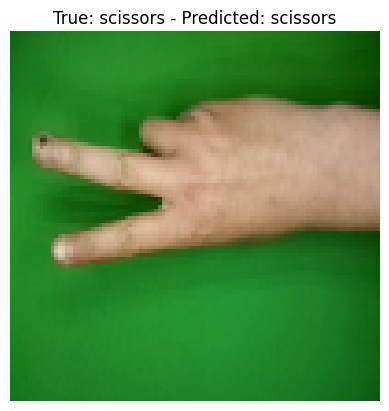

In [46]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

idx = random.randint(0, len(X_test)-1)
sample_image = X_test[idx]
sample_label = y_test[idx]


sample_image_reshaped = sample_image.reshape(100, 100, 3)

prediction_probs = model.predict(sample_image.reshape(1, -1))
predicted_class = np.argmax(prediction_probs)

plt.imshow(sample_image_reshaped)
plt.title(f"True: {class_names[sample_label]} - Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


### ***using cnn ***

In [48]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


dataset_path = "/root/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2/rps-cv-images"
IMG_SIZE = (100, 100)
class_names = ['rock', 'paper', 'scissors']

X_list = []
y_list = []

for label_index, label in enumerate(class_names):
    folder = os.path.join(dataset_path, label)
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0
            X_list.append(img_array)
            y_list.append(label_index)

X = np.array(X_list)
y = np.array(y_list)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2188, 100, 100, 3)
y shape: (2188,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,059 (6.61 MB)

 Trainable params: 1,732,611 (6.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.9804 - loss: 0.0625

44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9806 - loss: 0.0620 - val_accuracy: 0.6943 - val_loss: 2.9601
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.9893 - loss: 0.0444

44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9892 - loss: 0.0446 - val_accuracy: 0.7571 - val_loss: 1.6858
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - accuracy: 0.9956 - loss: 0.0127

44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 985ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.8886 - val_loss: 0.8061
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9928 - loss: 0.0274

44/44 ━━━━━━━━━━━━━━━━━━━━ 80s 943ms/step - accuracy: 0.9927 - loss: 0.0282 - val_accuracy: 0.9743 - val_loss: 0.1753
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 983ms/step - accuracy: 0.9857 - loss: 0.0823 - val_accuracy: 0.4486 - val_loss: 6.8778
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.9865 - loss: 0.0693

44/44 ━━━━━━━━━━━━━━━━━━━━ 80s 959ms/step - accuracy: 0.9864 - loss: 0.0698 - val_accuracy: 0.9800 - val_loss: 0.1562
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9903 - loss: 0.0344 - val_accuracy: 0.9714 - val_loss: 0.2697
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9944 - loss: 0.0229 - val_accuracy: 0.9286 - val_loss: 0.5920
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9948 - loss: 0.0215 - val_accuracy: 0.9771 - val_loss: 0.1813


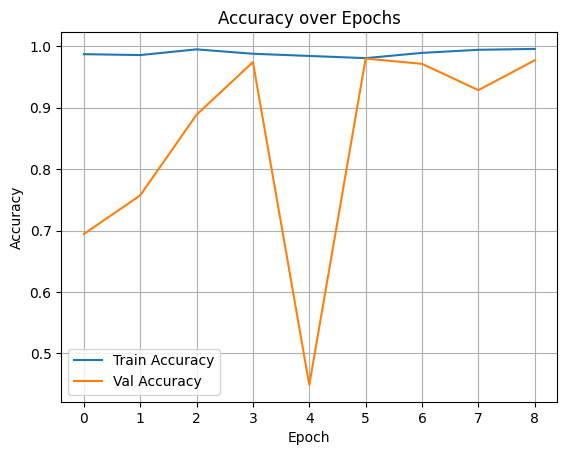

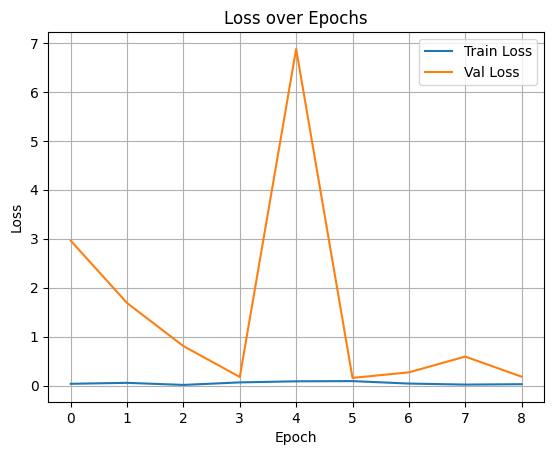

In [53]:
import matplotlib.pyplot as plt

# Acc
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
model.evaluate(X_test, y_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.9892 - loss: 0.0513


[0.06312064081430435, 0.9885844588279724]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


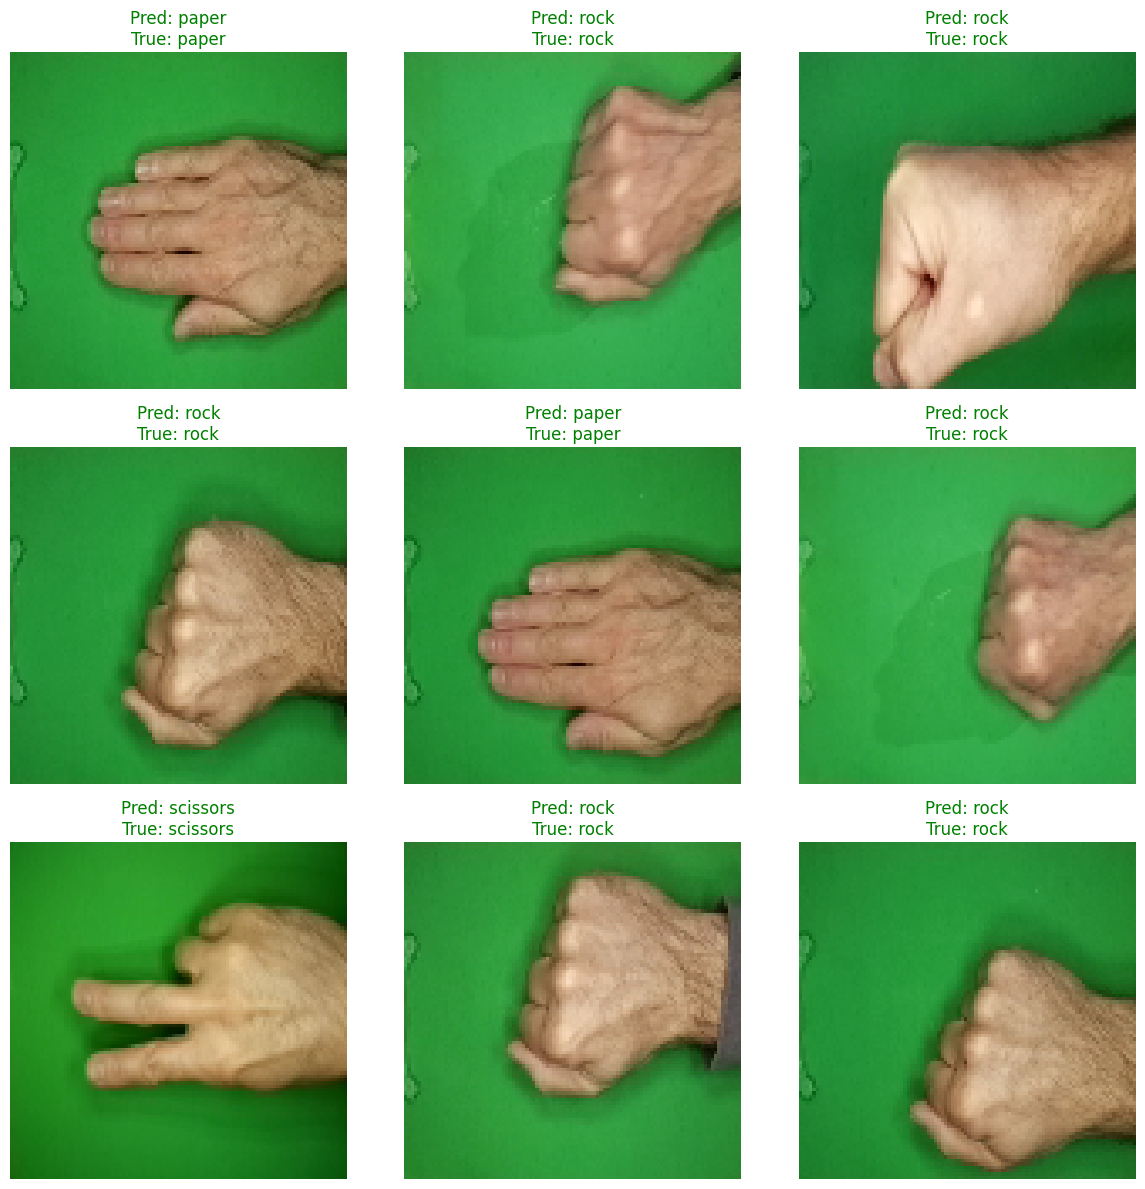

In [55]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['rock', 'paper', 'scissors']

num_samples = 9

indices = np.random.choice(len(X_test), size=num_samples, replace=False)

plt.figure(figsize=(12, 12))

for i, idx in enumerate(indices):
    image = X_test[idx]
    true_label = y_test[idx]

    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred_probs)

    color = 'green' if pred_label == true_label else 'red'
    label_text = f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}"

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label_text, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
